In [1]:
# Lets use the tumor_data.csv to build a simple classification model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv("/Users/olawalesalami/ML/aws-ml-bootcamp-2/StandFord Machine Learning/Data/tumor_data.csv")

# Split the data into features and labels
X = data.drop('malignant', axis=1)
y = data['malignant']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape) 
print("Testing set shape:", X_test.shape)



Training set shape: (800, 1)
Testing set shape: (200, 1)


In [2]:
# Compute initial loss
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Compute predictions with training data
z = np.dot(X_train, weights) + bias
y_pred = sigmoid(z)

# Compute initial loss
m = y_train.shape[0]
epsilon = 1e-15  # Prevent log(0)
y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

# Convert y_train to numpy array if it's a pandas Series
y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

loss = - (1/m) * np.sum(y_train_array * np.log(y_pred_clipped) + (1 - y_train_array) * np.log(1 - y_pred_clipped))
print("Initial loss:", loss)
print(f"y_train shape: {y_train.shape}, y_pred shape: {y_pred.shape}")




Initial loss: 0.6931471805599452
y_train shape: (800,), y_pred shape: (800,)


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.5962
Iteration 200: Loss = 0.5361
Iteration 300: Loss = 0.4973
Iteration 400: Loss = 0.4711
Iteration 500: Loss = 0.4527
Iteration 600: Loss = 0.4393
Iteration 700: Loss = 0.4293
Iteration 800: Loss = 0.4217
Iteration 900: Loss = 0.4157

Final loss after training: 0.4110
Final weights: [1.49796521]
Final bias: 0.012530419668275698


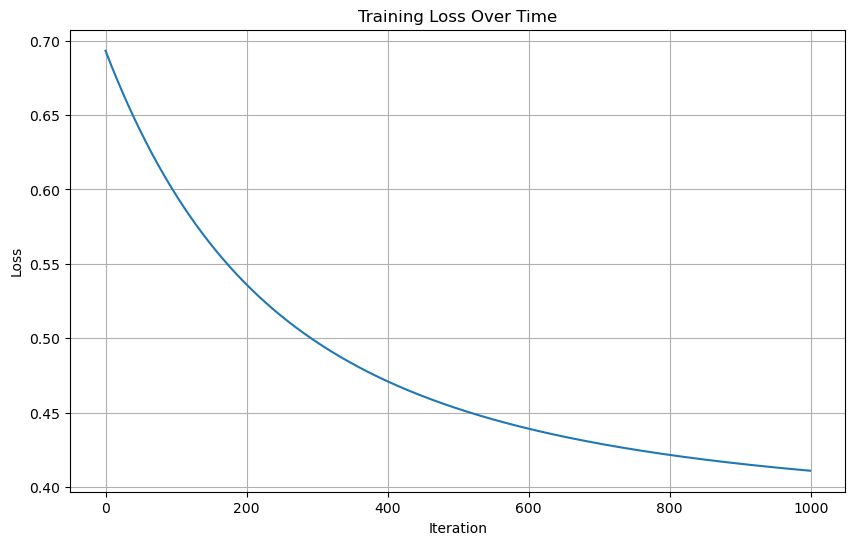

In [5]:
# FIXED VERSION - Cell 3

# Gradient descent to update weights and bias
learning_rate = 0.01
num_iterations = 1000

def train_logistic_regression(X, y, weights, bias, learning_rate, num_iterations):
    m = y.shape[0]
    loss_history = []
    
    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        # Compute loss
        epsilon = 1e-15
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -(1/m) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
        loss_history.append(loss)
        
        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return weights, bias, loss_history

# Train the model
final_weights, final_bias, loss_history = train_logistic_regression(
    X_train, y_train_array, weights, bias, learning_rate, num_iterations
)

# Compute final loss using UPDATED weights
z_final = np.dot(X_train, final_weights) + final_bias  # ✅ Use final_weights
y_pred_final = sigmoid(z_final)
y_pred_clipped = np.clip(y_pred_final, epsilon, 1 - epsilon)
final_loss = -(1/m) * np.sum(y_train_array * np.log(y_pred_clipped) + 
                              (1 - y_train_array) * np.log(1 - y_pred_clipped))

print(f"\nFinal loss after training: {final_loss:.4f}")
print(f"Final weights: {final_weights}")
print(f"Final bias: {final_bias}")

# Plot loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()



In [6]:
# After predictions
y_pred_final = sigmoid(np.dot(X_test, final_weights) + final_bias)
y_pred_binary = (y_pred_final > 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))



Accuracy: 0.8300
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       101
           1       0.84      0.81      0.82        99

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

